<span style='font-size:xx-large'>**An executable block incorporating all of my code together can be found at the final cell**</span>  



<span style='font-size:xx-large'>**Q1**</span>  

<span style='font-size:small'>In python arrays data is transposed such that a matrix with </span><span style='font-size:small'>_A_</span><span style='font-size:small'>  columns by </span><span style='font-size:small'>_B_</span><span style='font-size:small'> rows becomes a 2D array with </span><span style='font-size:small'>_B_</span><span style='font-size:small'> columns and </span><span style='font-size:small'>_A_</span><span style='font-size:small'> rows. We now have a </span><span style='font-size:small'>_N_</span><span style='font-size:small'> by 2 ray matrix being transformed by a \(2,2\) matrix which allows the multiplication to be processed.</span>
$$\left( \begin{matrix} a & b \\ c & d \end{matrix} \right) \left( \begin{matrix} y_1 & y_2 & ... \\ \theta_1 & \theta_2 & ... \end{matrix} \right)  = \\ \left( \begin{matrix} ay_1+b\theta_1 & ay_2+b\theta_2 & ... \\ cy_1+d\theta_1 &  cy_2+d\theta_2 & ... \end{matrix} \right)$$  
As can be seen, when this array is transformed by matrix M, the output array countains the propagattion of the incoming ray.  



<span style='font-size:xx-large'>**Q2**</span>

we have 4 different use cases that broadly do the same thing. In terms of clarity it would make sense to create a new class for each element that inherit a method from a main bigger class.

Plan:

- Have one big class that would contain the array of incoming rays since I assume those would always be the same
- This can also include the transformation function
- Create 4 separate sub\-classes for each unique optical element
- Within each unique sub\-class include the relevant transformation matrix

Below is a rudimentary plan for the code:\-

```
class Main:                             #Creating the main class to hold all of the subclasses
	
    rays = [the ray data]                 # Currently unsure as to whether I should allow the pass-through of the ray data or not
    
	def propagate(self, rays):
        '''
        This is the propagation function that will compute the matrix multiplication of the rays and transformation matrix.
        
        Inputs
        -------
        
        self: 2D Matrix
        	The specific transformation associated with the optical element
         
        rays: 2 x N Matrix
        	The incoming rays
            
        Returns
        --------
        
        propagated_wave: 2 x N Matrix
        	The computed transformed rays at the incidence boundary
        '''
        return propagated_wave
    
    class OpticalElement1:
        transformation matrix = [matrix]
        propagated_wave = propagate(transformation_matrix, rays)
        
    class OpticalElement2:
        transformation matrix = [matrix]
        propagated_wave = propagate(transformation_matrix, rays)
```

And now my final version:\-

```
import numpy as np

class Optical:
    rays = [[0,0,0,0],[0,0,0,0]]

    def propagate(self):
        '''
        This is the propagation function that will compute the matrix multiplication of the rays and transformation matrix. There is no need to input any variables when calling this function.

        Inputs
        -------

        None

        Returns
        --------

        propagated_wave: 2 x N Matrix
        	The computed transformed rays at the incidence boundary
        '''
        #Since there is no **user** input for this function I do not see the need for tests for this function
        propagated_wave = np.matmul(self.matrix, Optical.rays) # Matrix multiplication function

        return propagated_wave

class Transmission(Optical): # This will be the free transmission class where the user must define the matrix themself
    def __init__(self, d):            # I will be using the __init__ function that runs when an object is added to test user input
        '''
        Initialising function. Runs some tests on the user input and
        formats the matrix so that it is in the correct shape for the
        multiplication function.

        Input
        -------

        d: int, float
            The transmission deflection parameter

        Returns
        --------

        None
        '''
        try:
            assert(type(d) == int or float) # This checks that the input is a number
        except AssertionError:
            return print('Input must be a number')
        self.matrix = [[1, d],[0, 1]]
        return

class Planar(Optical): # This will be the free transmission class where the user must define the matrix themself
    def __init__(self, n):            # I will be using the __init__ function that runs when an object is added to test user input
        '''
        Initialising function. Runs some tests on the user input and
        formats the matrix so that it is in the correct shape for the
        multiplication function.

        Input
        -------

        n: int, float
            The refractive index ratio between the two planes

        Returns
        --------

        None
        '''
        try:
            assert(type(n) == int or float) # This checks that the input is a number
        except AssertionError:
            return print('Input must be a number')
        self.matrix = [[1, 0],[0, n]]
        return

class ThinLens(Optical):
    def __init__(self, f):
        '''
        Initialising function. Runs some tests on the user input and
        formats the matrix so that it is in the correct shape for the
        multiplication function.

        Input
        -------

        f: int, float
            The focal distance of the lens in meters

        Returns
        --------

        None
        '''
        try:
            assert(type(f) == int or float) # This checks that the input is a number
        except AssertionError:
            return print('Input must be a number')
        self.matrix = [[1, 0],[1/f, 1]]
        return

class Spherical(Optical):
    def __init__(self, n1, n2, R):
        '''
        Initialising function. Runs some tests on the user input and
        formats the matrix so that it is in the correct shape for the
        multiplication function.

        Input
        -------

        n1: int float
            The refractive index of the incident ray material

        n2: int float
            The refractive index of the refracted ray material

        R: int float
            The radius of curvature of the lens. R > 0 for convex lens

        Returns
        --------

        None
        '''
        for variable in [n1,n2,R]:
            try:
                assert(type(variable) == int or float) # This checks that the input is a number
            except AssertionError:
                return print('Input must be a number')
        self.matrix = [[1, 0],[(n1-n2)/R*n2, n1/n2]]
        return
```



<span style='font-size:xx-large'>**Q3**</span>  

<span style='font-size:small'>I will implement the </span>`__add__`<span style='font-size:small'>method to allow the building of complex objects by adding them. What should actually happen though is that the refraction matrices should be multiplied, with the first item being the furthest right. The main issue to solve here being if the user needs to add multiple elements, and making sure that all the elements are consistent.</span>

<span style='font-size:small'>My solution is as follows:\-</span>

```
class Optical:

    def __add__(self, others):
        '''
        The function to build more complex optical systems by combining simpler optical objects. Complex object is built layer by layer from point of view of light path.

        Inputs
        -------

        x1: Optical Object
            e.g. ThinLens(1) or Spherical(3,4,5)

        x2: Optical Object ArrayLike
            One or multiple other optical class objects

        e.g. Lens = Spherical(1,2,3) + Transmission(2) + Spherical(1,2,-3)

        Outputs
        --------

        Output: Complex optical object
            Initialises the Complex class for your object. The resultant matrix can be found under self.matrix
        '''
        try:
            assert(type(others).__bases__ == type(self).__bases__) # Checking to see if the parent class of all items is also optical
        except AssertionError:
            return print(f'{others} must also be an optical object')
        result = np.matmul(others.matrix, self.matrix)
        output = Complex(result) # Making the result an optical object such that this code can be used to add multiple things together and stay self-consistent
        return output

class Complex(Optical): # Created a new complex class to allow the building of any possible transformation matrix
    def __init__(self, matrix):
        '''
        A class allowing for the creation of any custom transformation matrix. It is more advised to build this using a combination of smaller classes using the add function.

        Input
        ------

        Matrix: ArrayLike
            The 2 x 2 transformation matrix of the material

        Output
        -------

        None
        '''
        try:
            assert(np.shape(matrix) == (2,2))              # First we must check that the matrix is the correct shape
        except AssertionError:
            return print(f'Matrix is not in the correct shape')
        for item in matrix:
            try:                                          # Next we must check that all values are integers or floats
                assert(type(item) == float or int)
            except AssertionError:
                return print(f'All matrix values must be integers or floats')
        self.matrix = matrix
        return
       
```



<span style='font-size:xx-large'>**Q4** </span>

This problem is most easily solved by adding a new class for a thick lens. This thick lens class will use some of the functions defined previously such as the `__add__()` to properly initialise itself. This allows me to hard code in the focal length without having to do complicated mathematics to determined if the optical element even converges.

Looking up the specific details , there is a well known equation for the focal distance of a converging thick lens in air: 

<div style='text-align: center;'><span style='font-size:large'> $P =\frac{1}{f}=(n-1)(\frac{1}{R_1}-\frac{1}{R_2}+\frac{(n-1)d}{nR_1R_2})$ </span></div>

A small plan for how my code should work:-

```py
 'I\'ll create a new ThickLens class to hard code in the focal length'
class ThickLens(Optical):
    def __init__(self, n, r1, r2, d):
        '''
        Tests seem a little unnecessary since I'm calling more basic classes that already test user input
        '''
        len1 = Spherical(1,n,r1)
        len2 = Transmission(d)
        len3 = Spherical(n,1,r2)
        self.matrix = (len1 + len2 + len3).matrix
        # This class should have a specific attribute for focal length
        self.focus = ((n-1)((1/r1)-(1/r2)+(n-1)*d/n*r1*r2))**-1
```

My solution:\-  


```py
class ThickLens(Optical):
    def __init__(self, n, r1, r2, d):
        '''
        Tests seem a little unnecessary since I'm calling more basic classes that already test user input
        '''
        len1 = Spherical(1,n,r1)
        len2 = Transmission(d)
        len3 = Spherical(n,1,r2)
        self.matrix = (len1 + len2 + len3).matrix
        # This class should have a specific attribute for focal length
        premult = n-1
        radiidiff = (1/r1)-(1/r2)
        travel = d*(n-1)/(n*r1*r2)
        power = premult*(radiidiff + travel)
        self.focus = power**-1
        pass
```



<span style='font-size:xx-large'>**Q5**</span>

<span style='font-size:small'>This is a simple task. All I need to do is create new objects for each new wavelength as the refractive index will be different. After </span>  
<span style='font-size:small'>that I create a polar plot using matplotlib with the image as a background.</span>

```py
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(seed=50)
rints = rng.integers(low=0, high=100, size=50)

r = 0.250
d = 0.010

wave_400 = ThickLens(1.4701, r, r, d)
wave_410 = ThickLens(1.520, r, r, d)

Optical.rays = [rints,rints]
wave_400.propagate()
wave_410.propagate()

y_400 = wave_400.propagated_wave[0,:]
angle_400 = wave_400.propagated_wave[1,:]

y_410 = wave_410.propagated_wave[0,:]
angle_410 = wave_410.propagated_wave[1,:]


fig, ax = plt.subplots(subplot_kw = {'projection' : 'polar'})
ax.set_theta_direction(direction=1)

ax.plot(angle_400, y_400, 'ob')
ax.plot(angle_410, y_410, 'or')

ax.set_title('Angles')
plt.show()
```



<div style='text-align: center;'><span style='font-size:xx-large;' class='bold'><em>Executable final block</em></span></div>



In [3]:
import numpy as np

class Optical:
    rays = np.array([[8,0,-8],[0,0,0]])

    def __add__(self, others):
        '''
        The function to build more complex optical systems by combining simpler optical objects. Complex object is built layer by layer from point of view of light path.

        Inputs
        -------

        x1: Optical Object
            e.g. ThinLens(1) or Spherical(3,4,5)

        x2: Optical Object ArrayLike
            One or multiple other optical class objects

        e.g. Lens = Spherical(1,2,3) + Transmission(2) + Spherical(1,2,-3)

        Outputs
        --------

        Output: Complex optical object
            Initialises the Complex class for your object. The resultant matrix can be found under self.matrix
        '''
        try:
            assert(type(others).__bases__ == type(self).__bases__) # Checking to see if the parent class of all items is also optical
        except AssertionError:
            return print(f'BUILD ERROR: \"{others}\" must also be an optical object')
        result = np.matmul(others.matrix, self.matrix)
        output = Complex(result) # Making the result an optical object such that this code can be used to add multiple things together and stay self-consistent
        return output

    def propagate(self):
        '''
        This is the propagation function that will compute the matrix multiplication of the rays and transformation matrix. There is no need to input any variables when calling this function.

        Inputs
        -------

        None

        Returns
        --------

        propagated_wave: 2 x N Matrix
        	The computed transformed rays at the incidence boundary
        '''
        #Since there is no **user** input for this function I do not see the need for tests for this function
        self.propagated_wave = np.matmul(self.matrix, Optical.rays) # Matrix multiplication function

        return self.propagated_wave

class Transmission(Optical): # This will be the free transmission class where the user must define the matrix themself
    def __init__(self, d):            # I will be using the __init__ function that runs when an object is added to test user input
        '''
        Transmission through a material with a constant refractive index

        Input
        -------

        d: int|float
            The transmission distance

        Returns
        --------

        None
        '''
        try:
            assert(type(d) == int or float) # This checks that the input is a number
        except AssertionError:
            return print('Input must be a number')
        self.matrix = [[1, d],[0, 1]]
        return

class Planar(Optical): # This will be the free transmission class where the user must define the matrix themself
    def __init__(self, n):            # I will be using the __init__ function that runs when an object is added to test user input
        '''
        A planar refracting surface

        Input
        -------

        n: int|float
            The refractive index ratio between the two materials

        Returns
        --------

        None
        '''
        try:
            assert(type(n) == int or float) # This checks that the input is a number
        except AssertionError:
            return print('Input must be a number')
        self.matrix = [[1, 0],[0, n]]
        return

class ThinLens(Optical):
    def __init__(self, f):
        '''
        A lens modelled to have zero thickness

        Input
        -------

        f: int, float
            The focal distance of the lens in meters

        Returns
        --------

        None
        '''
        try:
            assert(type(f) == int or float) # This checks that the input is a number
        except AssertionError:
            return print('Input must be a number')
        self.matrix = [[1, 0],[-1/f, 1]]
        return

class Spherical(Optical):
    def __init__(self, n1, n2, R):
        '''
        A spherical refracting surface

        Input
        -------

        n1: int|float
            The refractive index of the incident ray material

        n2: int|float
            The refractive index of the refracted ray material

        R: int|float
            The radius of curvature of the lens. R > 0 for convex lens

        Returns
        --------

        None
        '''
        for variable in [n1,n2,R]:
            try:
                assert(type(variable) == int or float) # This checks that the input is a number
            except AssertionError:
                return print('Input must be a number')
        self.matrix = [[1, 0],[(n1-n2)/R*n2, n1/n2]]
        return

class Complex(Optical): # Created a new complex class to allow the building of any possible transformation matrix
    def __init__(self, matrix):
        '''
        A class allowing for the creation of any custom transformation matrix. It is advised to build this using a combination of smaller classes using the add function.

        Input
        ------

        Matrix: ArrayLike
            The 2 x 2 transformation matrix of the material

        Output
        -------

        None
        '''
        try:
            assert(np.shape(matrix) == (2,2))              # First we must check that the matrix is the correct shape
        except AssertionError:
            return f'Matrix is not in the correct shape, must be [[a, b], [c, d]]'
        for item in matrix:
            for value in item:
                try:                                          # Next we must check that all values are integers or floats
                    assert(type(item) == float or int)
                except AssertionError:
                    return f'All matrix values must be integers or floats'
        self.matrix = matrix
        return

class ThickLens(Optical):
    def __init__(self, n, r1, r2, d):
        '''
        Tests seem a little unnecessary since I'm calling more basic classes that already test user input
        '''
        len1 = Spherical(1,n,r1)
        len2 = Transmission(d)
        len3 = Spherical(n,1,r2)
        self.matrix = (len1 + len2 + len3).matrix
        # This class should have a specific attribute for focal length
        premult = n-1
        radiidiff = (1/r1)-(1/r2)
        travel = d*(n-1)/(n*r1*r2)
        power = premult*(radiidiff + travel)
        self.focus = power**-1
        pass

In [6]:
Lens = ThickLens(1.4701, 0.25, -0.25, 0.01)
print(Lens.focus)

0.2676123826792812


<div style='text-align: center;'><span style='font-size:xx-large' class='bold'> The Graph:</span></div>

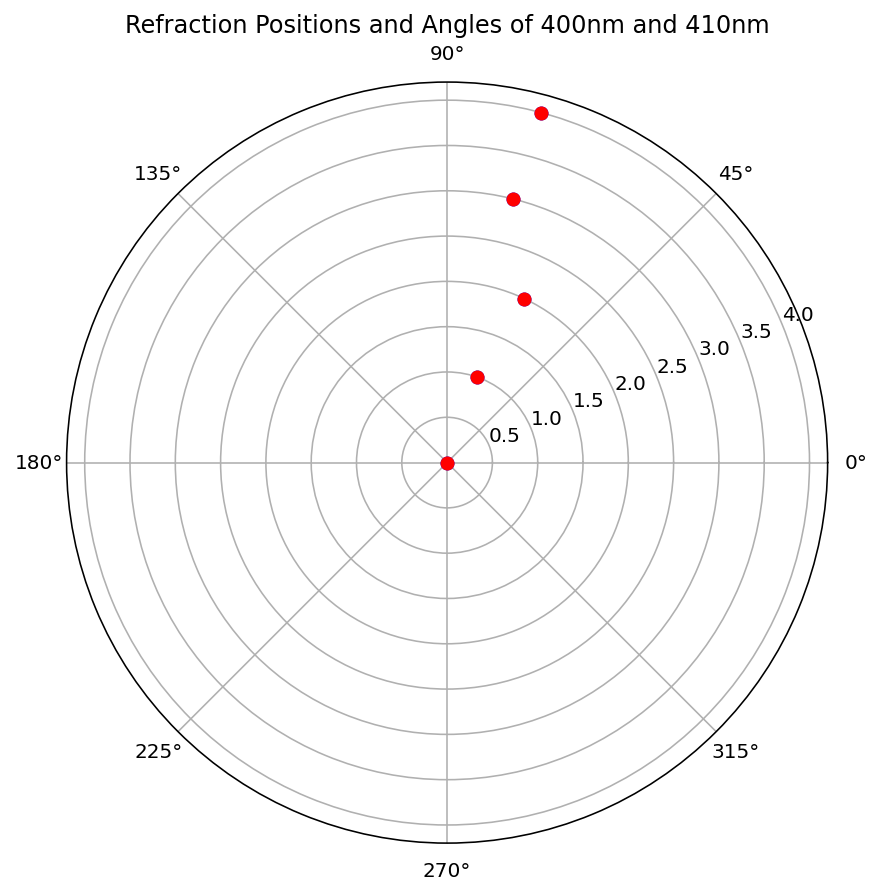

Height 	   θ₄₀₀ 	   θ₄₁₀ 	 Δθ (deg)
0.0 	  70.8953677 	  70.8940712 	  1.296E-03
10.0 	  70.8953677 	  70.8940712 	  1.296E-03
20.0 	  64.8186219 	  64.8174365 	  1.185E-03
30.0 	  75.9593225 	  75.9579334 	  1.389E-03
40.0 	  74.9465315 	  74.9451610 	  1.371E-03
Lower frequency is refracting more??


In [9]:
import matplotlib.pyplot as plt
import numpy as np

size = 5 #Deciding how many light rays to simulate
rng = np.random.default_rng(seed=50) # Setting up my random number generator such that it is repeatable
rints = rng.integers(low=0, high=90, size=size) # Making my random numbers, making sure they're integers with a max of 90. Light rays with angles at or greater than 90 do not hit the lens
ints = np.linspace(0, 40, num=size) # separating the light rays in height

r = 0.250 # Lens curvature
d = 0.010 # Lens thickness

wave_400 = ThickLens(1.4701, r, r, d) # Making my lenses
wave_410 = ThickLens(1.4691, r, r, d) # ^^

Optical.rays = [np.zeros(size),rints] # Defining my light rays
wave_400.propagate() # Propagating my waves
wave_410.propagate()

y_400 = wave_400.propagated_wave[0,:] # Pulling out my propagated wave heights and angles for 400 nm
angle_400 = wave_400.propagated_wave[1,:]

y_410 = wave_410.propagated_wave[0,:] # Repeat for 410 nm
angle_410 = wave_410.propagated_wave[1,:]

angle_400_rad = angle_400*(np.pi/180) # Converting my angles to radians for my plot
angle_410_rad = angle_410*(np.pi/180)

fig, ax = plt.subplots(subplot_kw = {'projection' : 'polar'})  # Making my polar plot
ax.set_theta_direction(direction=1)

ax.plot(angle_400_rad, ints/10, 'ob') # Plotting my data
ax.plot(angle_410_rad, ints/10, 'or')


ax.set_title('Refraction Positions and Angles of 400nm and 410nm')
plt.show()


print(f'Height \t   θ₄₀₀ \t   θ₄₁₀ \t Δθ (deg)')
for i in range(len(ints)):
    print(f'{ints[i]} \t {angle_400[i]: .7f} \t {angle_410[i]: .7f} \t {angle_400[i]-angle_410[i]: .3E}')

print(f'Lower frequency is refracting more??')